#### *3) Model Seçimi ve Eğitimi*

**Veri setinin okunması ve kütüphanelerin içe aktarımı :**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('breast-cancer.csv')

##### Kullanılan modeller : 

1) Destek Vektör Makineleri (SVM)
2) Rastgele Ormanlar (Random Forest)
3) XGBoost
4) Karar Ağaçları (Decision Tree)
5) K-En Yakın Komşu (KNN)
6) Naive Bayes

**Veri setini hazırlama ve ölçeklendirme(normalizasyon) :**

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Bağımlı ve bağımsız değişkenlerin seçimi
X = df.drop(columns=['id', 'diagnosis'])  # id sütunu çıkarıldı, diagnosis hedef değişken olarak belirlendi
y = df['diagnosis']  # hedef değişken

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Test seti : %20**
**Eğitim seti : %80**

**Modellerin eğitilmesi ve performanslarının değerlendirilmesi :**

In [22]:
from sklearn.svm import SVC
#Destek Vektör Makineleri (SVM)

svm_model = SVC()
svm_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Doğruluk Skoru:", accuracy_svm)
print(classification_report(y_test, y_pred_svm))

SVM Doğruluk Skoru: 0.9824561403508771
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [23]:
from sklearn.ensemble import RandomForestClassifier
#Rastgele Ormanlar (Random Forest)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Doğruluk Skoru:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Doğruluk Skoru: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [26]:
from xgboost import XGBClassifier
#XGBoost

# 'diagnosis' sütununu sayısal verilere dönüştürme
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Hedef değişkenlerin yeniden tanımlanması
y = df['diagnosis']

# Veri setini yeniden ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model eğitimi ve tahmin adımlarını tekrarlama
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Doğruluk Skoru:", accuracy_xgb)
print(classification_report(y_test, y_pred_xgb))

XGBoost Doğruluk Skoru: 0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [27]:
from sklearn.tree import DecisionTreeClassifier
#Karar Ağaçları (Decision Tree)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Doğruluk Skoru:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))

Decision Tree Doğruluk Skoru: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [29]:
from sklearn.neighbors import KNeighborsClassifier
#K-En Yakın Komşu (KNN)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Doğruluk Skoru:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))

KNN Doğruluk Skoru: 0.956140350877193
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [30]:
from sklearn.naive_bayes import GaussianNB
#Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Doğruluk Skoru:", accuracy_nb)
print(classification_report(y_test, y_pred_nb))

Naive Bayes Doğruluk Skoru: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Modellerin doğruluk skorlarının ve diğer metri̇klerinin karşılaştırılması :**

C:\Users\edana\AppData\Local\Temp\ipykernel_21344\908359293.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores_df.index, y=scores_df['Accuracy'], palette='viridis')


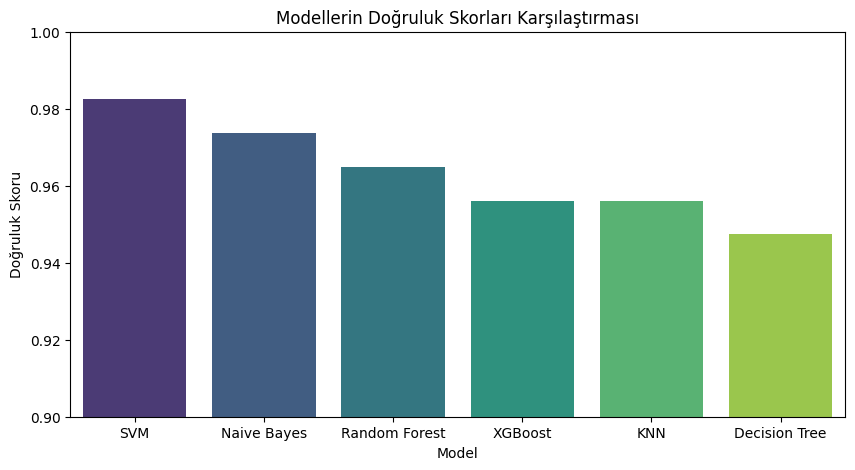

In [32]:
model_scores = {
    'SVM': accuracy_svm,
    'Random Forest': accuracy_rf,
    'XGBoost': accuracy_xgb,
    'Decision Tree': accuracy_dt,
    'KNN': accuracy_knn,
    'Naive Bayes': accuracy_nb,
}

# Sonuçları sıralı şekilde görselleştirme
scores_df = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Accuracy'])
scores_df = scores_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=scores_df.index, y=scores_df['Accuracy'], palette='viridis')
plt.title('Modellerin Doğruluk Skorları Karşılaştırması')
plt.ylabel('Doğruluk Skoru')
plt.xlabel('Model')

# Y ekseni aralığını daraltma
plt.ylim(0.9, 1.0)

plt.show()

## SEÇİLEN MODEL : SVM